# Revisiting "Tableau in the time of corona"

Previous post here: https://www.linkedin.com/pulse/tableau-time-corona-mary-dy/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Working with 2019 data

In [16]:
df2019 = pd.read_csv("data/no2_bathRoadside_2019_short.csv")
df2019.head()

,Date,Time,Nitrogen dioxide,Status,Nitrogen oxides as nitrogen dioxide,Status.1
0,2019-01-01,01:00:00,33.23608,V ugm-3,61.18806,V ugm-3
1,2019-01-01,02:00:00,33.72772,V ugm-3,57.8806,V ugm-3
2,2019-01-01,03:00:00,36.44534,V ugm-3,66.09019,V ugm-3
3,2019-01-01,04:00:00,34.67313,V ugm-3,61.77868,V ugm-3
4,2019-01-01,05:00:00,30.41936,V ugm-3,48.25352,V ugm-3


In [17]:
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3624 entries, 0 to 3623
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Date                                 3624 non-null   object
 1   Time                                 3624 non-null   object
 2   Nitrogen dioxide                     3624 non-null   object
 3   Status                               3624 non-null   object
 4   Nitrogen oxides as nitrogen dioxide  3624 non-null   object
 5   Status.1                             3624 non-null   object
dtypes: object(6)
memory usage: 170.0+ KB


* No missing values
* Date column is object rather than time series --> convert
* Date column is in YYYY-MM-DD format
* Time column not necessary for initial purposes --> discard or exclude
* Nitrogen dioxide column is object rather than numeric --> convert
* Status and Status.1 column not necessary for purposes, but remember that the unit measurement is ugm3
* Nitrogen oxides column --> probably exclude for simplicity, but possibly add values to Nitrogen dioxide. Convert dtype from object to numeric first, if including in analysis. Will be excluded for initial purposes

#### Clean 2019 end product: 
* Exclude all other columns for now
* Date column as datetime values
* Time as is; will be excluded in following aggregations
* Nitrogen dioxide as numeric values

#### Work with clean 2019 to aggregate and plot NO2 levels.

In [18]:
clean2019 = df2019[["Date", "Time", "Nitrogen dioxide"]]
clean2019.head()

,Date,Time,Nitrogen dioxide
0,2019-01-01,01:00:00,33.23608
1,2019-01-01,02:00:00,33.72772
2,2019-01-01,03:00:00,36.44534
3,2019-01-01,04:00:00,34.67313
4,2019-01-01,05:00:00,30.41936


In [21]:
clean2019["Date"] = pd.to_datetime(clean2019["Date"])
clean2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3624 entries, 0 to 3623
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3624 non-null   datetime64[ns]
 1   Time              3624 non-null   object        
 2   Nitrogen dioxide  3624 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 85.1+ KB


C:\Users\marydy\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
clean2019["Nitrogen dioxide"] = pd.to_numeric(clean2019["Nitrogen dioxide"], errors="coerce")
clean2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3624 entries, 0 to 3623
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3624 non-null   datetime64[ns]
 1   Time              3624 non-null   object        
 2   Nitrogen dioxide  3557 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.1+ KB


C:\Users\marydy\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
# missing values popped up in Nitrogen dioxide column
clean2019["Nitrogen dioxide"].isna().sum()

67

In [30]:
clean2019["Nitrogen dioxide"].fillna(0, inplace=True)
clean2019.info()
# no more missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3624 entries, 0 to 3623
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3624 non-null   datetime64[ns]
 1   Time              3624 non-null   object        
 2   Nitrogen dioxide  3624 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.1+ KB


C:\Users\marydy\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [147]:
clean2019["year"] = clean2019.Date.dt.year # add year column for use in later concatenations
clean2019.head()

C:\Users\marydy\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Time,Nitrogen dioxide,year
0,2019-01-01,01:00:00,33.23608,2019
1,2019-01-01,02:00:00,33.72772,2019
2,2019-01-01,03:00:00,36.44534,2019
3,2019-01-01,04:00:00,34.67313,2019
4,2019-01-01,05:00:00,30.41936,2019


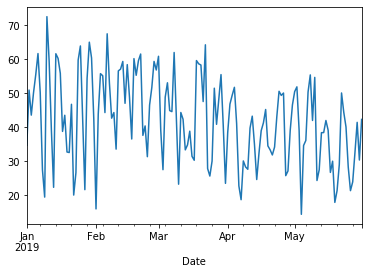

In [150]:
groupDay19 = clean2019.groupby(["Date"]).mean() # some hours were originally "No data", so some days do not have a full reading. Presenting total levels of NO2 skews numbers
groupDay19["Nitrogen dioxide"].plot()
# Note: how to make this expository?

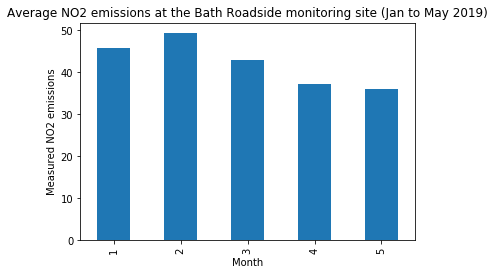

In [152]:
groupMth19 = groupDay19.groupby(groupDay19.index.month).mean() # some days do not have a full reading. Presenting total levels of NO2 skews numbers
groupMth19["Nitrogen dioxide"].plot.bar().set(title="Average NO2 emissions at the Bath Roadside monitoring site (Jan to May 2019)",
     xlabel="Month",
     ylabel="Measured NO2 emissions");
# Note: how to make this expository?

#### In 2019, February was the month with the highest average NO2 pollution measured in Bath.

## Working with 2020 data

In [55]:
df2020 = pd.read_csv("data/BHA4_2020.csv", skiprows=4)
df2020.head()

,Date,time,Nitric oxide,status,unit,Nitrogen dioxide,status.1,unit.1,Nitrogen oxides as nitrogen dioxide,status.2,unit.2
0,01-01-2020,01:00,4.94166,P,ugm-3,27.36253,P,ugm-3,34.93963,P,ugm-3
1,01-01-2020,02:00,4.84929,P,ugm-3,18.12881,P,ugm-3,25.56428,P,ugm-3
2,01-01-2020,03:00,10.84163,P,ugm-3,24.41802,P,ugm-3,41.04162,P,ugm-3
3,01-01-2020,04:00,8.79800,P,ugm-3,19.59939,P,ugm-3,33.08947,P,ugm-3
4,01-01-2020,05:00,8.38235,P,ugm-3,15.96711,P,ugm-3,28.81986,P,ugm-3


In [56]:
df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Date                                 3648 non-null   object 
 1   time                                 3648 non-null   object 
 2   Nitric oxide                         3603 non-null   float64
 3   status                               3603 non-null   object 
 4   unit                                 3603 non-null   object 
 5   Nitrogen dioxide                     3603 non-null   float64
 6   status.1                             3603 non-null   object 
 7   unit.1                               3603 non-null   object 
 8   Nitrogen oxides as nitrogen dioxide  3603 non-null   float64
 9   status.2                             3603 non-null   object 
 10  unit.2                               3603 non-null   object 
dtypes: float64(3), object(8)
memor

* Some missing values
* Date column is object rather than time series --> convert
* Date column is in DD-MM-YYYY format; NOTE DIFFERENT FROM clean2019!
* Time column not necessary for initial purposes --> discard or exclude
* Nitric oxide column not necessary for initial purposes --> discard or exclude
* Nitrogen dioxide column is already a float dtype
* Status and unit columns not necessary for purposes, but remember that the unit measurement is ugm3
* Nitrogen oxides column --> probably exclude for simplicity, but possibly add values to Nitrogen dioxide. no conversion needed, if including in analysis. Will be excluded for initial purposes

#### Clean 2020 end product: 
* Exclude all other columns for now; keep:
* Date column as datetime values --> force format into YYYY-MM-DD so similar to clean2019!
* Time as is; will be excluded in following aggregations

#### Work with clean 2020 to aggregate and plot NO2 levels.

In [57]:
clean2020 = df2020[["Date", "time", "Nitrogen dioxide"]]
clean2020

,Date,time,Nitrogen dioxide
0,01-01-2020,01:00,27.36253
1,01-01-2020,02:00,18.12881
2,01-01-2020,03:00,24.41802
3,01-01-2020,04:00,19.59939
4,01-01-2020,05:00,15.96711
...,...,...,...
3643,31-05-2020,20:00,15.30000
3644,31-05-2020,21:00,11.47500
3645,31-05-2020,22:00,13.19625
3646,31-05-2020,23:00,11.66625


In [58]:
clean2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3648 non-null   object 
 1   time              3648 non-null   object 
 2   Nitrogen dioxide  3603 non-null   float64
dtypes: float64(1), object(2)
memory usage: 85.6+ KB


In [61]:
# missing values in Nitrogen dioxide column
clean2020["Nitrogen dioxide"].fillna(0, inplace=True)
clean2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3648 non-null   object 
 1   time              3648 non-null   object 
 2   Nitrogen dioxide  3648 non-null   float64
dtypes: float64(1), object(2)
memory usage: 85.6+ KB


C:\Users\marydy\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [67]:
clean2020["Date"] = pd.to_datetime(clean2020["Date"], dayfirst=True)
clean2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3648 non-null   datetime64[ns]
 1   time              3648 non-null   object        
 2   Nitrogen dioxide  3648 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.6+ KB


C:\Users\marydy\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [154]:
clean2020["year"] = clean2020.Date.dt.year # add year column for use in later concatenations
clean2020.head()

C:\Users\marydy\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,time,Nitrogen dioxide,year
0,2020-01-01,01:00,27.36253,2020
1,2020-01-01,02:00,18.12881,2020
2,2020-01-01,03:00,24.41802,2020
3,2020-01-01,04:00,19.59939,2020
4,2020-01-01,05:00,15.96711,2020


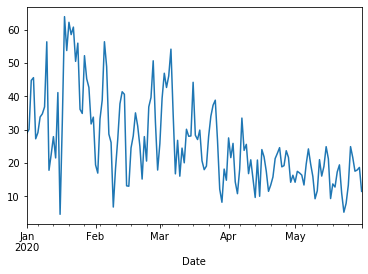

In [156]:
groupDay20 = clean2020.groupby(["Date"]).mean()
groupDay20["Nitrogen dioxide"].plot();

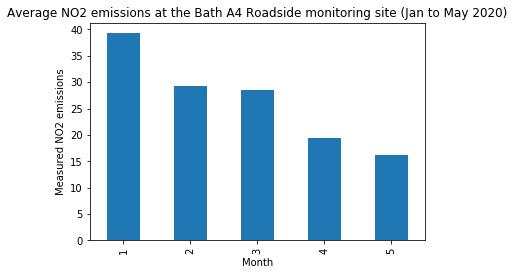

In [157]:
groupMth20 = groupDay20.groupby(groupDay20.index.month).mean() # some days do not have a full reading. Presenting total levels of NO2 skews numbers
groupMth20["Nitrogen dioxide"].plot.bar().set(title="Average NO2 emissions at the Bath A4 Roadside monitoring site (Jan to May 2020)",
     xlabel="Month",
     ylabel="Measured NO2 emissions");
# Note: how to make this expository?

#### In 2020, *January* was the month with the highest average NO2 pollution detected in Bath.

# What's the difference between the years?

#### Year to date (January to May)

In [138]:
import altair as alt

In [177]:
groupMth20.rename(columns={"Nitrogen dioxide":"NO2 lvl 2020"})
groupMth20

,NO2 lvl 2020,year
Date,,
1,39.262113,2020
2,29.328675,2020
3,28.536797,2020
4,19.341834,2020
5,16.189415,2020


In [182]:
groupMth19.rename(columns={"NO2 lvl 2020":"NO2 lvl 2019"}, inplace=True)
groupMth19

,NO2 lvl 2019,year
Date,,
1,45.704779,2019
2,49.304280,2019
3,43.046216,2019
4,37.355302,2019
5,36.074275,2019


In [187]:
dfyoy = pd.concat([groupMth20, groupMth19], axis=1).drop(["year"], axis=1)
dfyoy

,NO2 lvl 2020,NO2 lvl 2019
Date,,
1,39.262113,45.704779
2,29.328675,49.304280
3,28.536797,43.046216
4,19.341834,37.355302
5,16.189415,36.074275


In [195]:
dfyoy["diff"] = dfyoy["NO2 lvl 2020"] - dfyoy["NO2 lvl 2019"]
dfyoy["pcdiff"] = (dfyoy["diff"] / dfyoy["NO2 lvl 2019"])*100
dfyoy

,NO2 lvl 2020,NO2 lvl 2019,diff,pcdiff
Date,,,,
1,39.262113,45.704779,-6.442666,-14.096263
2,29.328675,49.304280,-19.975606,-40.514952
3,28.536797,43.046216,-14.509419,-33.706608
4,19.341834,37.355302,-18.013468,-48.221984
5,16.189415,36.074275,-19.884860,-55.121994


In [201]:
dfyoy.describe()

,NO2 lvl 2020,NO2 lvl 2019,diff,pcdiff
count,5.000000,5.000000,5.000000,5.000000
mean,26.531767,42.296971,-15.765204,-38.332360
std,9.118168,5.577162,5.662165,15.757904
min,16.189415,36.074275,-19.975606,-55.121994
25%,19.341834,37.355302,-19.884860,-48.221984
50%,28.536797,43.046216,-18.013468,-40.514952
75%,29.328675,45.704779,-14.509419,-33.706608
max,39.262113,49.304280,-6.442666,-14.096263


### The average NO2 emissions detected in Bath dropped approximately 38% in the first five months of 2020 compared to the same period in 2019.
The largest drop in emissions occurred in May, with approximately 55% less emissions in 2020 than in 2019.

# Future plans:

Visualise, visualise, visualise. If I was working on this in Excel, I would generate:
* highest level aggregate: a year-on-year barchart of the year-to-date averages. Annotations to include average numbers and percent change.
* next level aggregate: by year-on-year by month. Same annotations
* daily detail: year-on-year line chart by day, highlighting major events in the lockdown timeline.

# Learning takeaway: 
The learning curve is steeep. This whole thing took me a day. If I was working in Excel, it would've taken probably an hour tops including a brief writeup.